# Predicting Heart Disease using machine learning
This notebook looks into using various Python-based machine learning and dat science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease on their medical attributes.

we're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data

The original data came from the cleavland data from the UCI Machine Learning Repository. There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during tthe prooof of concept, we'll pursue the project.

## 4.Features

**Create data dictionary**

age: Displays the age of the individual.

sex: Displays the gender of the individual using the following format : 1 = male 0 = female

cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

exang- Exercise induced angina : 1 = yes 0 = no

oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

## Preparing the tools

we're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [1]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 ## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you going to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

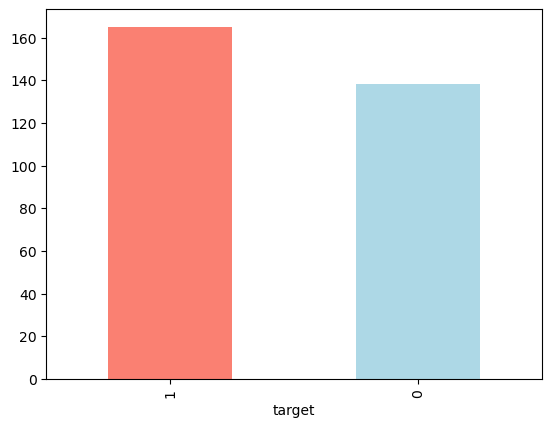

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease according to sex

## Finding Patterns

In [9]:
#df.sex.value_counts()
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


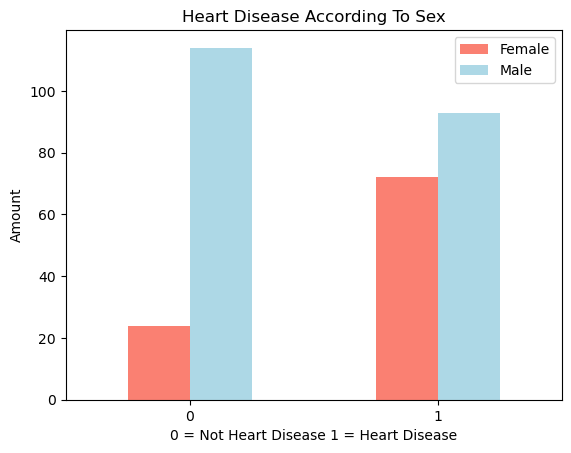

In [11]:
# Making the above matrix more interactive and intuitive
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"]);
plt.title("Heart Disease According To Sex")
plt.legend(["Female","Male"])
plt.xlabel("0 = Not Heart Disease 1 = Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

## Avg vs Max heart rate (thalach)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


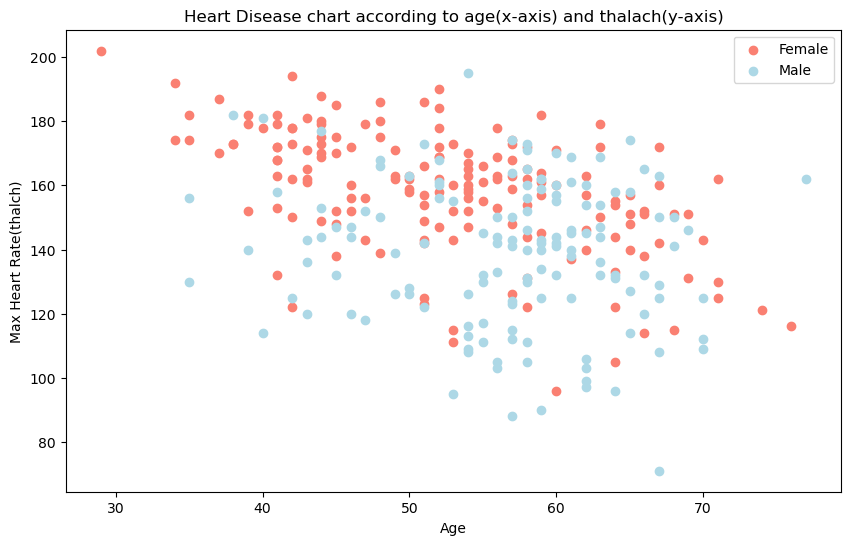

In [13]:
plt.figure(figsize=(10,6))
# Sactter plot with postive(Have heart disease) values
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='salmon');

# Scatter plot negative (Not have heart disease) values
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue");

## Adding some info
plt.title("Heart Disease chart according to age(x-axis) and thalach(y-axis)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate(thalch)")
plt.legend(["Female","Male"]);

## Heart disease frequency per chest pain (cp)
1. cp chest pain type
    * typical angina 
    * atypical angina 
    * non-anginal
    * asymptomatic

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


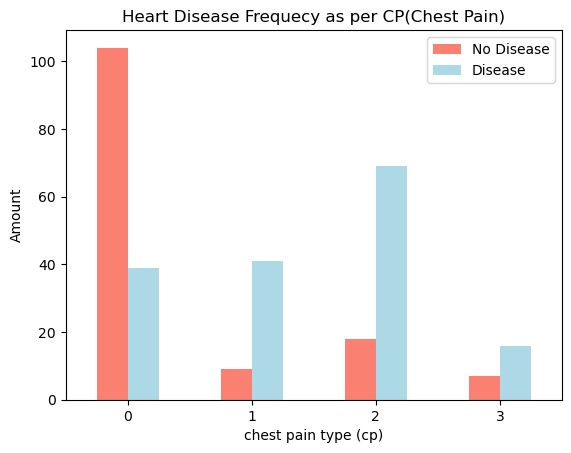

In [15]:
## Make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequecy as per CP(Chest Pain)")
plt.xlabel("chest pain type (cp)")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

## Building a correlation matrix
It's a a big table of numbers telling us how each independent variable is related to each other 

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


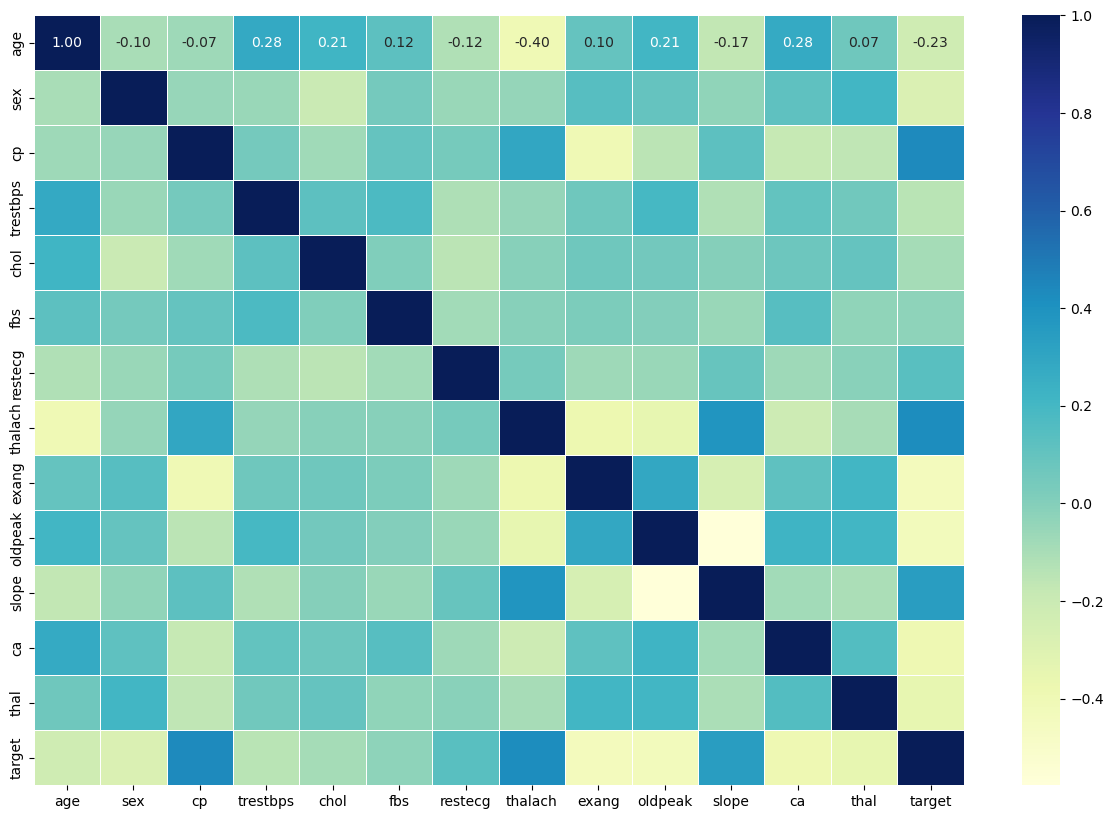

In [17]:
# Let's make it more prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [18]:
plt.figure(figsize=(15,8))
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


<Figure size 1500x800 with 0 Axes>

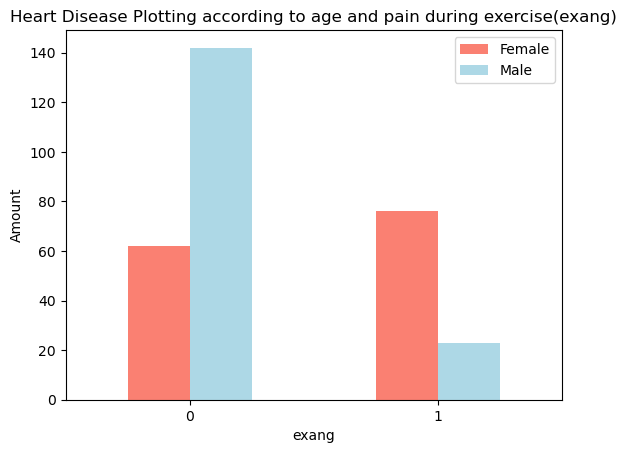

In [19]:
pd.crosstab(df.exang,df.target).plot(kind="bar",
                                  color=["salmon","lightblue"])


plt.title("Heart Disease Plotting according to age and pain during exercise(exang)")
plt.xlabel("exang")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop("target",axis=1)
y = df["target"]

In [22]:
## Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Now we will train it and find the patterns on tarin data set 

And then we will test it (use the patterns) on test data set

we're going to try 3 ML models:
* K-Nearest Neighbours Classifier
* RandomForestClassifier
* Logistic Regression

In [23]:
## Creating a function for reuse again and again
## First create a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()
         }
## define the function
def train_score(models,X_train,X_test,y_train,y_test):
    """
    Fitting the models and evaluatring the scores of the models in one go
    """
    np.random.seed(42)
    # Declare a empty dictionary
    model_score ={}
    for name,model in models.items():
        # Fit the model one by one
        model.fit(X_train,y_train)
        # evaluate the score of each model and assign it to model_score dictionary
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [24]:
model_score = train_score(models,X_train,X_test,y_train,y_test)
model_score

C:\Users\ SHAID\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8524590163934426}

# Model Comaparison

C:\Users\ SHAID\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


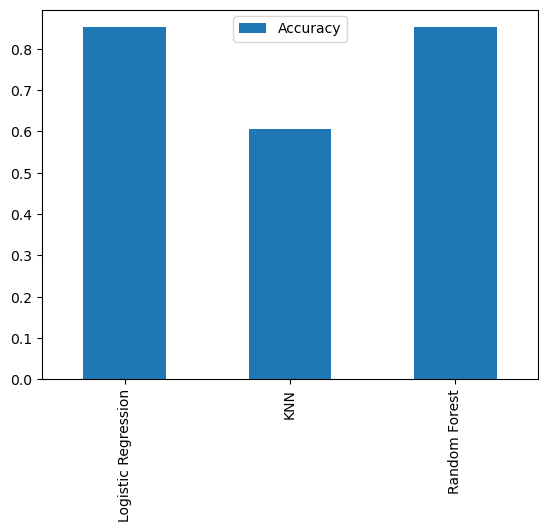

In [25]:
model_score = train_score(models,X_train,X_test,y_train,y_test)
model_compare = pd.DataFrame(model_score,index=["Accuracy"])
model_compare.T.plot(kind="bar");

# Tuning Hyperparameters

Let's look at the following:
* Hyperparameter tuning
* Feature impotance
* Confusion matrix
* Cross-val score
* Precision
* F1-score
* Recall
* Classification Report
* ROC curve
* Area under curve (AUC)


In [26]:
# Let's tune KNN
# Create a different empty list of KNN train and test scores 
train_score = []
test_score = []
# Set a range for n_neighbours
neighbors = range(1,21)

# Loop thorugh the range 
for i in neighbors:
    np.random.seed(42)
    # Instantiate KNN classifier
    KNN = KNeighborsClassifier(n_neighbors = i)
    # Train the model
    KNN.fit(X_train,y_train)
    # Now append the train and test score into train_score and test_score list respectively
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

In [27]:
train_score

[1.0,
 0.8099173553719008,
 0.7892561983471075,
 0.78099173553719,
 0.78099173553719,
 0.7851239669421488,
 0.71900826446281,
 0.7396694214876033,
 0.7355371900826446,
 0.71900826446281,
 0.7148760330578512,
 0.6983471074380165,
 0.7148760330578512,
 0.7272727272727273,
 0.7148760330578512,
 0.71900826446281,
 0.71900826446281,
 0.7107438016528925,
 0.6942148760330579,
 0.6983471074380165]

In [28]:
test_score

[0.6229508196721312,
 0.5409836065573771,
 0.5737704918032787,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.5573770491803278,
 0.6065573770491803,
 0.5737704918032787,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082]

Maximum KNN score on test data set:67.21%


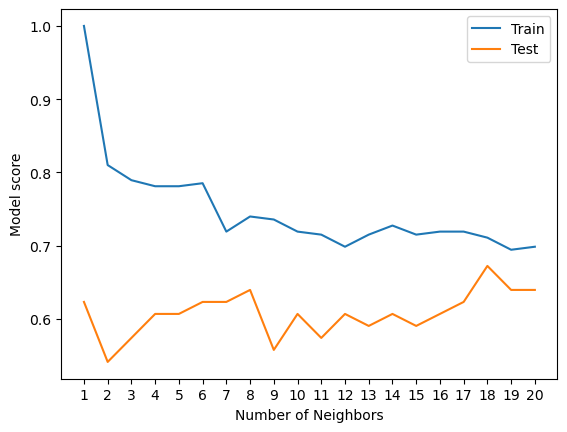

In [29]:
plt.plot(neighbors,train_score,label="Train score")
plt.plot(neighbors,test_score,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.legend(["Train","Test"]);
print(f"Maximum KNN score on test data set:{max(test_score)*100:.2f}%")

## Hyperparameters Tuning with RandomizedSearchCV
we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [30]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
# create hyperparameters grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Let's Tune the above grids using RandomizedSearchCV

In [31]:
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperpaarmeter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose=True)
# Fit the random hyperparameter search(rs_log_reg) model for LoLogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
# Check the best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,y_test)

0.8360655737704918

In [34]:
# Let's tune RandomForestClassifier
np.random.seed(42)
# create random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                          verbose=True)
# Fit the random hyperparameter search (rs_rf) model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [36]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

## Hyperparameters tuning with GridSearchCV

In [37]:
## Create diiferent hyperparameters grid 
## Creating hyperparameter grid for Logisticrgression
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}
## Creating hyperparameter grid for RandomForestClassifier
rf_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [38]:
## let's tune LogisticRegression
# Create a grid search hyperparameter for logisticregression
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit the grid hypeparameter serach model for logisticregression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.score(X_test,y_test)

0.8360655737704918

In [40]:
model_score

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8524590163934426}

In [41]:
## let's tune RandomForestClassifier
# Create a grid search hyperparameter for RandomForestClassifier
np.random.seed(42)
gs_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid=rf_grid,
                      scoring='accuracy',
                      verbose=True)
# Fit the grid hypeparameter serach model for RandomForestClassifier
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ SHAID\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ SHAID\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ SHAID\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\ SHAID\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 600, i

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy', verbose=True)

In [42]:
gs_rf.best_params_

{'max_depth': 3,
 'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [43]:
gs_rf.score(X_test,y_test)

0.8524590163934426

## Evaluating our tuned machine learning classifier,beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification Report
* precission
* Recall
* f1-score
  

In [44]:
## To make comaparisons first we need to make predictions
# Let's predict with tuned models
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [45]:
y_test

23     1
288    0
240    0
19     1
189    0
      ..
165    0
287    0
126    1
35     1
55     1
Name: target, Length: 61, dtype: int64

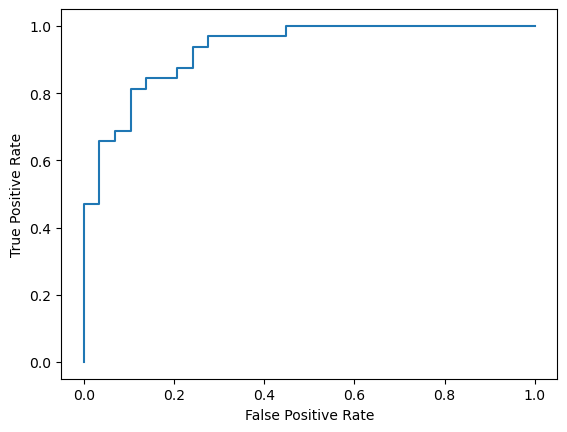

In [46]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Calculate predicted probabilities
y_score = gs_log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)

# Plot ROC curve and calculate the AUC metric
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot();

In [47]:
y_score

array([0.56480889, 0.05788064, 0.06389864, 0.84850725, 0.66463831,
       0.02060338, 0.97464973, 0.95161072, 0.93107848, 0.76750196,
       0.59432892, 0.69840913, 0.84106536, 0.7711989 , 0.84510573,
       0.77102551, 0.31080009, 0.36346188, 0.50255574, 0.97547699,
       0.9226223 , 0.20185812, 0.07723864, 0.56265773, 0.66580692,
       0.57570343, 0.29959279, 0.75152708, 0.91812925, 0.01827173,
       0.85537848, 0.85847768, 0.8808933 , 0.54440512, 0.76784747,
       0.70424449, 0.89660554, 0.15634617, 0.86412156, 0.06400853,
       0.13664056, 0.17606212, 0.91835477, 0.04554232, 0.96314645,
       0.90472661, 0.20828439, 0.82953741, 0.31303005, 0.02991966,
       0.01818546, 0.03079976, 0.80959433, 0.64501349, 0.11453576,
       0.53810089, 0.01212777, 0.69394058, 0.71469675, 0.78771542,
       0.69967058])

In [48]:
# Confusion Matrix
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [50]:
print(confusion_matrix(y_test,y_preds))

[[20  9]
 [ 1 31]]


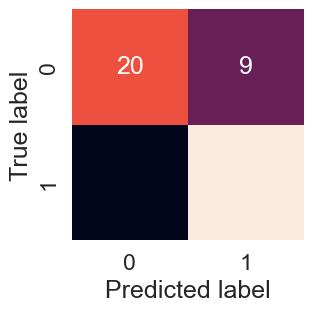

In [51]:
import seaborn as sns
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plt.show()
plot_conf_mat(y_test, y_preds)

In [52]:
## Classification Report
print (classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80        29
           1       0.78      0.97      0.86        32

    accuracy                           0.84        61
   macro avg       0.86      0.83      0.83        61
weighted avg       0.86      0.84      0.83        61



## Calculate eavluation metrics using cross-validation 

In [53]:
## Check best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Create a new classifier grid with best parameter
clf = LogisticRegression(C= 0.20433597178569418, solver='liblinear')

In [55]:
# Cross-validated accuracy
cv_ac = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_ac_mean = np.mean(cv_ac)
cv_ac

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_ac_mean

0.8446994535519124

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision_mean = np.mean(cv_precision)
cv_precision_mean

0.8207936507936507

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9212121212121213

In [59]:
# Cross-validated f1-score
cv_f1_score = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1_score_mean = np.mean(cv_f1_score)
cv_f1_score_mean

0.8673007976269721

In [60]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_ac_mean,
                          "Precision":cv_precision_mean,
                          "Recall":cv_recall_mean,
                          "F1":cv_f1_score_mean},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


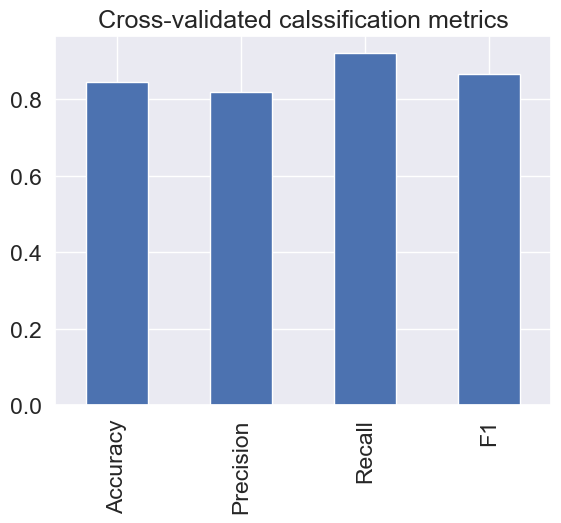

In [61]:
cv_metrics.T.plot(kind="bar",
                  title="Cross-validated calssification metrics",
                  legend=False);

## Feature Importance
Feature importance is another as asking, "Which features cibtributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "MODEL NAME" feature importance in chrome bar.

In [62]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,y_train);

In [63]:
clf.coef_

array([[ 0.01064752, -0.79732372,  0.70130319, -0.01618317, -0.00354545,
        -0.04277709,  0.20974018,  0.02932002, -0.53748388, -0.48379007,
         0.26445013, -0.58287063, -0.59464694]])

In [64]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.010647524277172063,
 'sex': -0.7973237216588871,
 'cp': 0.701303194097023,
 'trestbps': -0.016183171399586298,
 'chol': -0.0035454463010549785,
 'fbs': -0.04277709142776123,
 'restecg': 0.209740176473733,
 'thalach': 0.029320022592887494,
 'exang': -0.5374838787049746,
 'oldpeak': -0.48379006714177586,
 'slope': 0.2644501306539485,
 'ca': -0.5828706333576718,
 'thal': -0.5946469401321518}

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


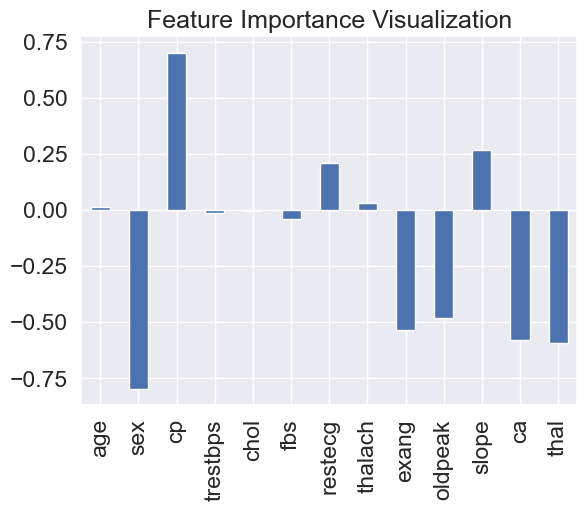

In [66]:
## Visualizeing feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance Visualization",legend=False);

## 6.Experimentation
if you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?hers?